## Data Understanding

The **HAM10000** dataset ("Human Against Machine with 10000 training images")[1] released by Philipp Tschandl, Cliff Rosendahl, Harald Kittler includes totally 10015 dermatoscopic images from different populations. This data set is prepared for academic machine learning studies.  More than 50% of lesions have been confirmed by pathology, while the ground truth for the rest of the cases was either follow-up, expert consensus, or confirmation by in-vivo confocal microscopy. The ground truths of more than half of the dataset was provided with pathology confirmation, the rest was provided by confirmation methods such as follow-up, expert consensus, or in-vivo confocal microscopy. And also there are csv files which includes comprehensive metadata  and pixel values of images.

## Data Glimpse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
df = pd.read_csv("../data/HAM10000_metadata.csv")

In [3]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Scheme

 - **lesion_id:**  unique id of lession
 
 Example:
```
"AM_0000118"
```
 - **image_id:** image id of lession
 
  Example:
```
"ISIC_0027419"
```
 - **dx:** short for diagnosis (for the patient
 
  Possible Values:
```
"bkl","nv", "df", "mel", "vasc", "bcc", "akiec"
```
 - **dx_type:** how the diagnosis was made
 
  Possible Values::
```
"histo", "consensus" ,"confocal", "follow_up"
```
 - **age:** The age of patient
 
  Possible Values:
```
"80.0"
```
 - **sex:** The sex of patient
 
  Example:
```
'male', 'female', 'unknown'
```
 - **localization:** the part of body
 
  Possible Values:
```
'scalp', 'ear', 'face', 'back', 'trunk', 'chest', 'upper extremity', 'abdomen', 'unknown', 'lower extremity', 'genital', 'neck', 'hand', 'foot', 'acral'
```

## Abbreviations Values

In the dataset, most categorical variables are abbreviated. The abbreviations are as follows;

##### Type of skin disease:

- **nv:** Melanocytic nevi
- **mel:**  Melanoma 
- **bkl:**  Benign keratosis-like lesions 
- **bcc:**  Basal cell carcinoma
- **akiec:**  Actinic keratoses
- **vasc:**  Vascular lesions
- **df:**  Dermatofibroma
    
#####  Diagnosis methods

- **histo:** histopathology 
- **follow_up:** follow up examination 
- **consensus:** expert consensus 
- **confocal:** confirmation by in-vivo confocal microscopy 

##  Skin  Images

In [4]:
im_dir = "../data/images/raw/"

In [5]:
print("The number of skin images:")
len(os.listdir(im_dir))

The number of skin images:


10015

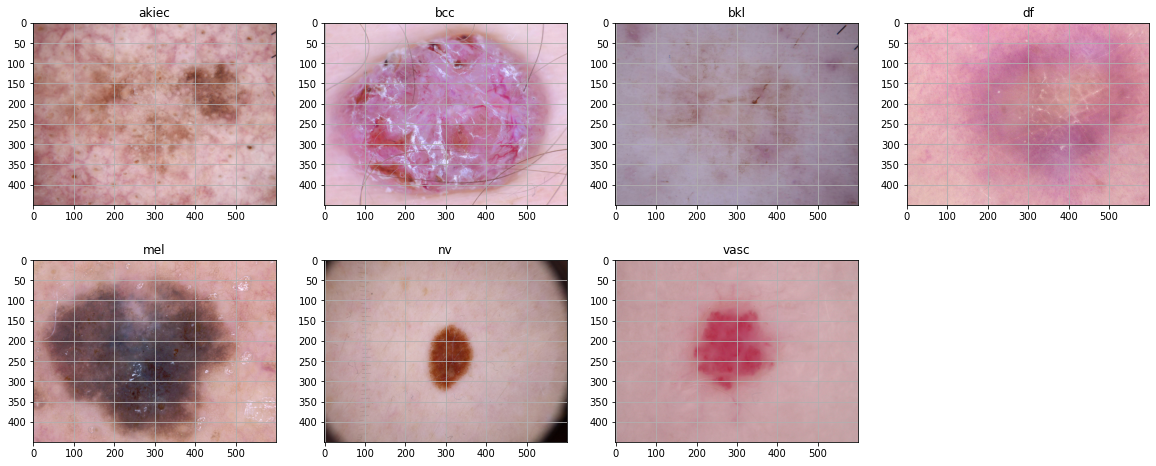

In [18]:
## images

df_sample = df.groupby('dx').apply(lambda x: x.sample(1)).reset_index(drop=True)

## plotting

fig = plt.figure(figsize=(20, 8))
columns = 4
rows = 2
for i in range(1, 8):
    image = Image.open(im_dir+df_sample.loc[i-1,"image_id"]+".jpg") # read an image
    fig.add_subplot(rows, columns, i)
    plt.title(df_sample.loc[i-1,"dx"])
    plt.imshow(image)
    plt.grid(None) # remove grid

plt.savefig('../graphs/skin_images_glimpse.png')
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

<Figure size 432x288 with 0 Axes>

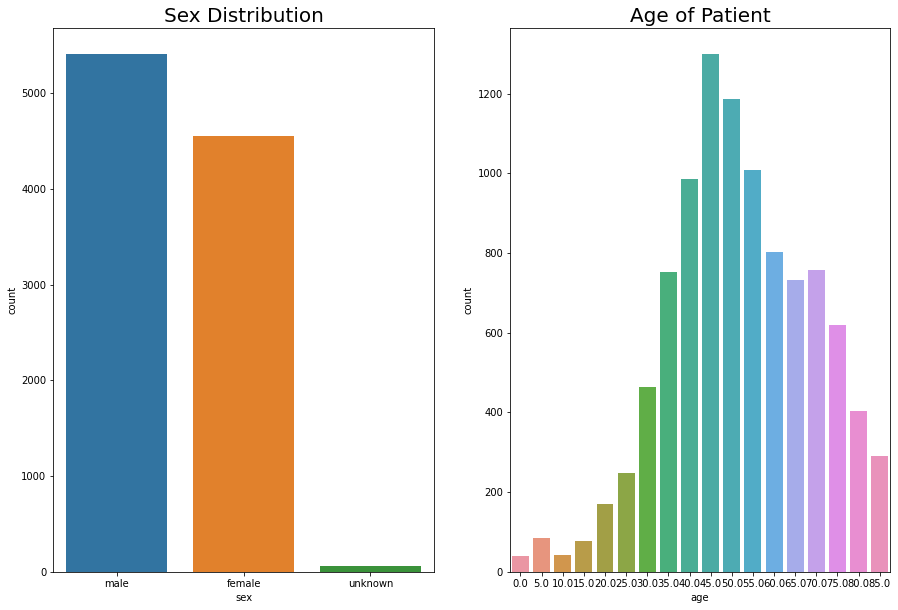

In [7]:
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=1.2)
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution",size=20)

plt.subplot(1,2,2)
sns.countplot(x="age", data=df)
plt.title("Age of Patient",size=20)

plt.savefig('../graphs/univariate_sex_age.png')
plt.show()

- Skin diseases are more common in men than women.
- Skin diseases occur mostly in people aged 45 years and the probability of having skin disease is quite high in the middle age group. The number of samples increase dramatically after 25 years old. It remains stable between the ages of 60 and 70 and starts to decline again after the age of 75.

<Figure size 432x288 with 0 Axes>

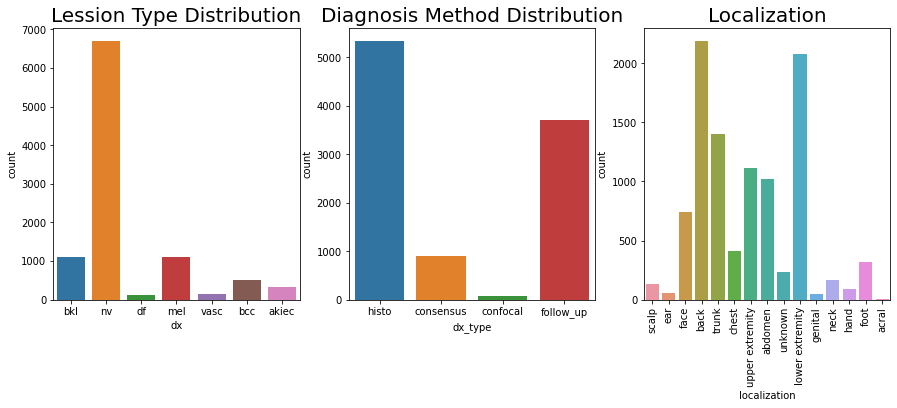

In [8]:
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.countplot(x="dx", data=df)
plt.title("Lession Type Distribution",size=20)

plt.subplot(1,3,2)
sns.countplot(x="dx_type", data=df)
plt.title("Diagnosis Method Distribution",size=20)

plt.subplot(1,3,3)
sns.countplot(x="localization", data=df)
plt.xticks(rotation=90)
plt.title("Localization",size=20)

plt.savefig('../graphs/univariate_type_confirmation_localization.png')

- Skin diseases occur mostly on the **"back"** and **"lower extremity"**(the part of the body from the hip to the toes) of the body and least on the **"acral"**.
- The most found disease among people is  **"nv"** (Melanocytic nevi) while the least found is **"df"**(Dermatofibroma) .
- Diagnosis methods is mostly done by **"histo"** (Histopathologhy) and **"follow_up"** (Follow-up)

### Bivariate Analysis

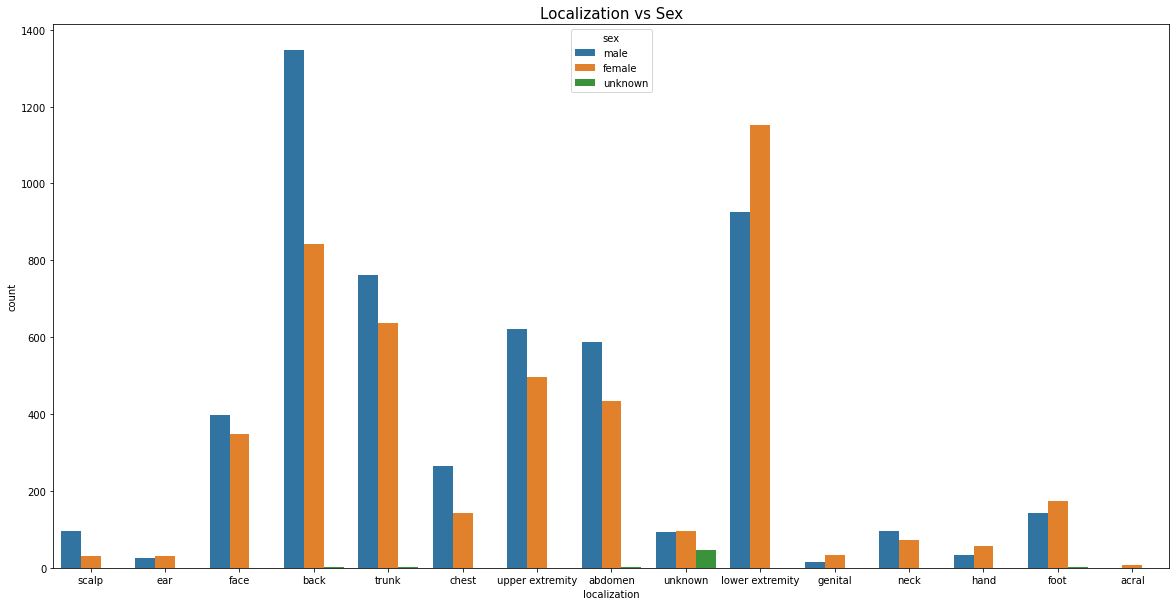

In [9]:
plt.figure(figsize=(20,10))
plt.title('Localization vs Sex',fontsize = 15)
sns.countplot(x='localization', hue='sex',data=df)
plt.savefig('../graphs/bivariate_localization_sex.png')

 - In the univariate analysis, it was stated that males are generally more commonly afflicted with skin diseases. However, skin diseases seen in the parts of the body vary according to gender. As seen in the plot above, In the part of **skin extremity area**, **foot** and **hand**, women have more skin diseases than men in the .

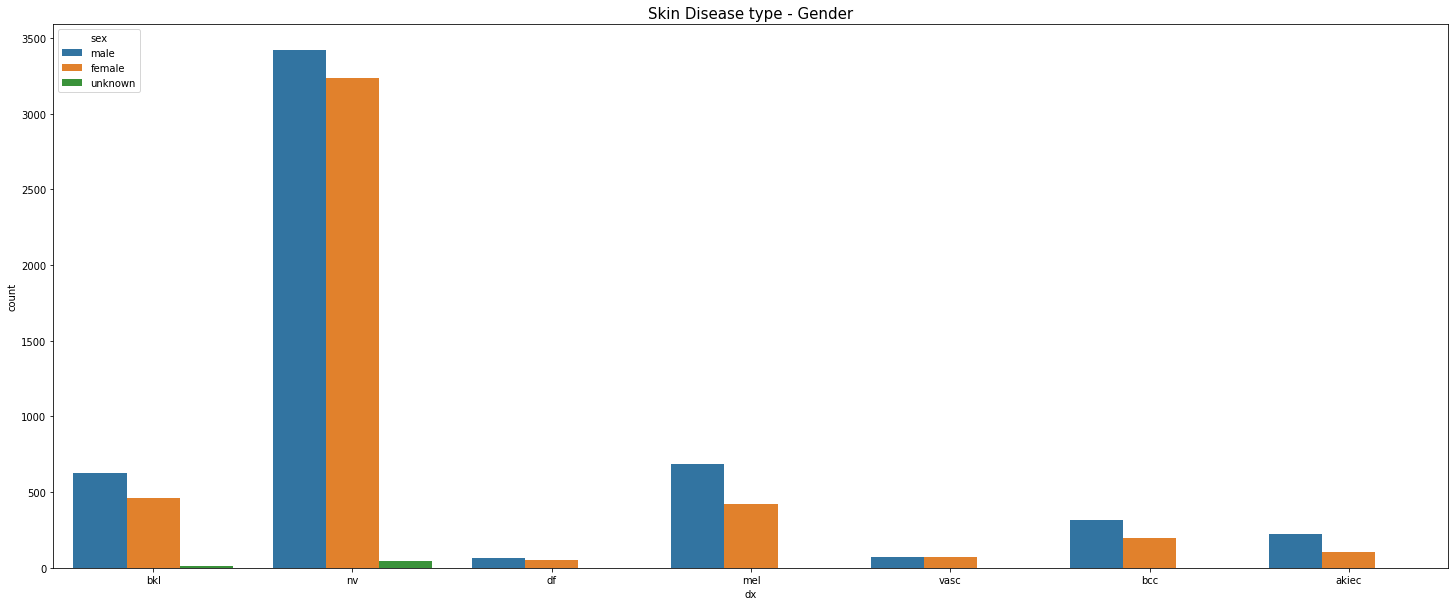

In [10]:
plt.figure(figsize=(25,10))
plt.title('Skin Disease type - Gender',fontsize = 15)
sns.countplot(x='dx', hue='sex',data=df)
plt.savefig('../graphs/bivariate_type_gender.png')

 - Males and females are affected the most by Melanocytic nevi.

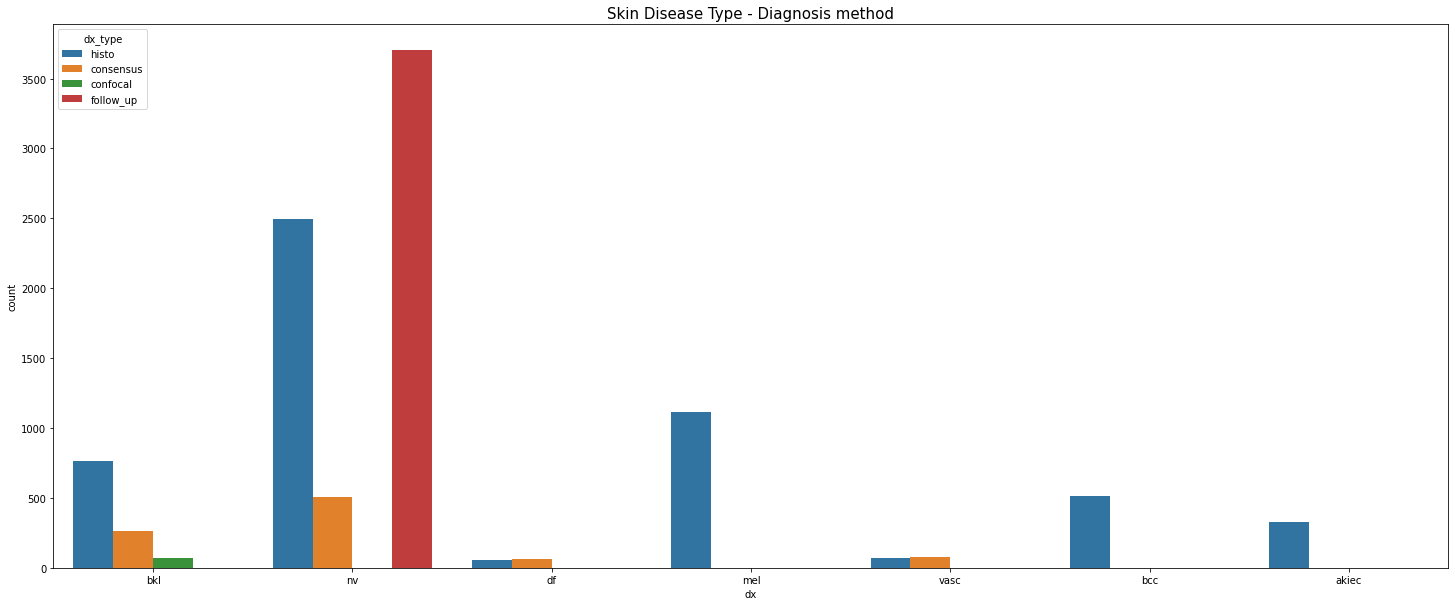

In [11]:
plt.figure(figsize=(25,10))
plt.title('Skin Disease Type - Diagnosis method',fontsize = 15)
sns.countplot(x='dx', hue='dx_type',data=df)
plt.savefig('../graphs/bivariate_type_diagnosis.png')

 - It seems possible to determine all skin disease types with the **histopathology** method.
 - When the **follow up examination** method was used, it was determined that the skin disease belonged only to Melanocytic nevi. In the same way **expert consensus** method was used to determine skin disease of the Benign keratosis-like lesions.
 - Confirmation by in-vivo confocal microscopy method was used to determine disease types except mel, bcc and akiec.

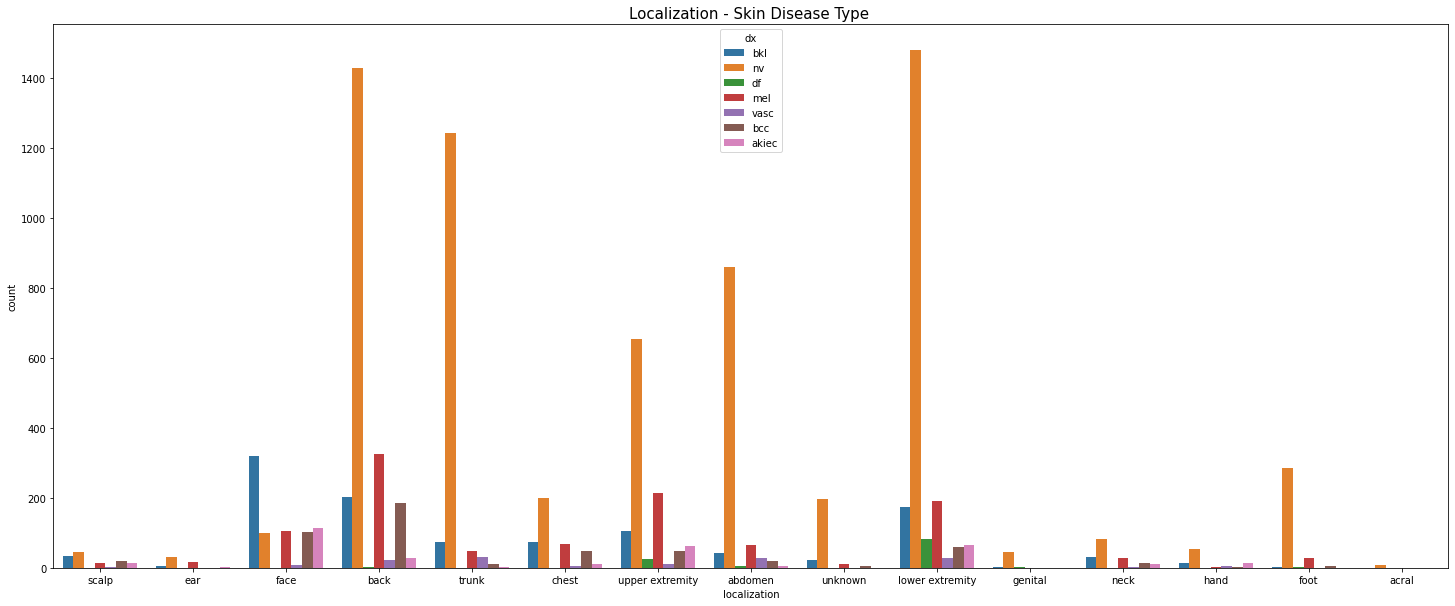

In [12]:
plt.figure(figsize=(25,10))
plt.title('Localization - Skin Disease Type ',fontsize = 15)
sns.countplot(x='localization', hue='dx',data=df)
plt.savefig('../graphs/bivariate_localization_type.png')

 - The body part most affected by a benign keratosis-like lesion is the **face**.
 - Body parts except face are infected the most by Melanocytic nevi.
 - Only Melanocytic nevi and Melanoma skin diseases occur in the feet.
 - Only Melanocytic nevi skin disease occurs in the genital area.

## Data Quality

### Missing Values

In [13]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


Looking at the dataset, only missing values are seen in the age column. However, we do not need to fill in these missing values for the deep learning model we will create.

# References

1. Tschandl, P., Rosendahl, C., & Kittler, H. (2018). The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Scientific Data, 5(1). https://doi.org/10.1038/sdata.2018.161